In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df =pd.read_csv(r"C:\Users\Sonal Sarode\Downloads\spam.csv",encoding='latin1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# Data Cleaning

In [5]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.isna().sum()


Target    0
Text      0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(403)

In [11]:
df =df.drop_duplicates(keep='first')
df

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
df.shape

(5169, 2)

In [13]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

df['Target']=le.fit_transform(df['Target'])
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# EDA

In [14]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x11761a5c0b0>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

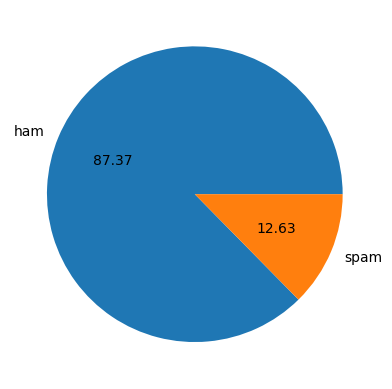

In [98]:
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')

In [16]:
import nltk
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt_tab to C:\Users\Sonal
[nltk_data]     Sarode\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [17]:
df['characters']=df['Text'].apply(len)

In [18]:
df.head()

,Target,Text,characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [22]:
df['num_sentence']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [23]:
df.head()

,Target,Text,characters,num_words,num_sentence
0,0,"go until jurong point, crazy.. available only ...",111,24,1
1,0,ok lar... joking wif u oni...,29,8,1
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,36,1
3,0,u dun say so early hor... u c already then say...,49,13,1
4,0,"nah i don't think he goes to usf, he lives aro...",61,15,1


In [24]:
df[['characters','num_words','num_sentence']].describe()

,characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.426001,1.887019
std,58.236293,13.286437,1.374667
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,216.000000,34.000000


In [25]:
df[df['Target']==0][['characters','num_words','num_sentence']].describe()

,characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.108282,1.748893
std,56.358207,13.464872,1.309920
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,216.000000,34.000000


In [26]:
df[df['Target']==1][['characters','num_words','num_sentence']].describe()

,characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.539051,2.842266
std,30.137753,6.967305,1.431864
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


# Data Preprocessing

In [27]:
import re
from nltk.stem import PorterStemmer
def clean_text(text):
    # Handle missing or non-string values
    if not isinstance(text, str):
        return ""

    # 1. Lowercasing
    text = text.lower()

    # 2. Removing special characters & punctuation
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. Tokenization
    tokens = word_tokenize(text)

    # 4. Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # 5. Stemming
    ps = PorterStemmer()
    stemmed_tokens = [ps.stem(word) for word in tokens]

    # Join tokens back into string
    cleaned_text = ' '.join(stemmed_tokens)
    return cleaned_text


    

In [28]:
df['cleaned_text'] = df['Text'].apply(clean_text)

In [29]:
df

,Target,Text,characters,num_words,num_sentence,cleaned_text
0,0,"go until jurong point, crazy.. available only ...",111,24,1,go jurong point crazi avail bugi n great world...
1,0,ok lar... joking wif u oni...,29,8,1,ok lar joke wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,36,1,free entri wkli comp win fa cup final tkt st m...
3,0,u dun say so early hor... u c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"nah i don't think he goes to usf, he lives aro...",61,15,1,nah dont think goe usf live around though
...,...,...,...,...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...,161,35,4,nd time tri contact u u pound prize claim easi...
5568,0,will ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"pity, * was in mood for that. so...any other s...",57,15,2,piti mood soani suggest
5570,0,the guy did some bitching but i acted like i'd...,125,27,1,guy bitch act like id interest buy someth els ...


In [30]:
df['Text'][0]

'go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...'

In [31]:
df['cleaned_text'][0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [106]:
from wordcloud import WordCloud
wc =WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [107]:
spam_wc =wc.generate(df[df['Target']==1]['cleaned_text'].str.cat(sep=' '))

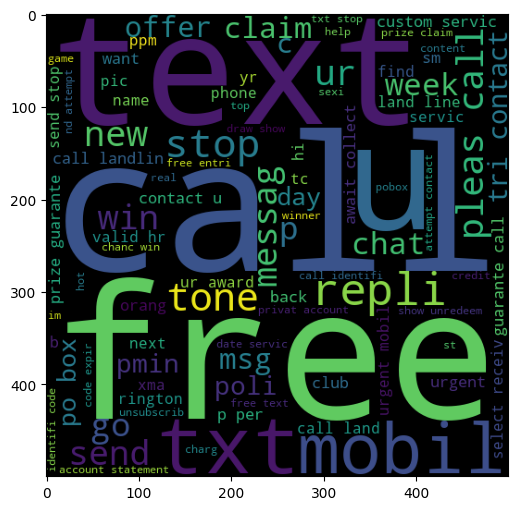

In [108]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [35]:
ham =wc.generate(df[df['Target']==0]['cleaned_text'].str.cat(sep=' '))

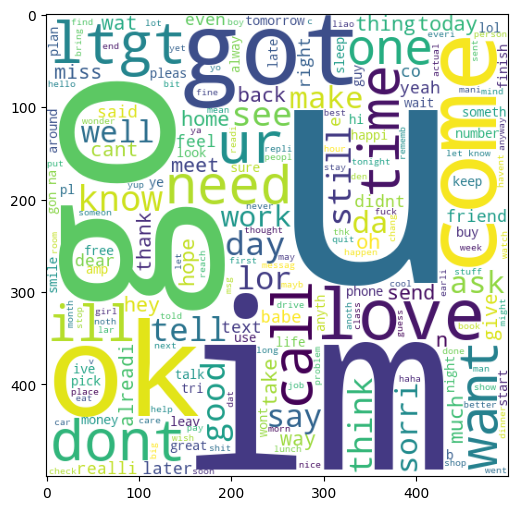

In [36]:
plt.figure(figsize=(15,6))
plt.imshow(ham)

In [37]:
spam_corpus =[]
for i in df[df['Target']==1]['cleaned_text'].tolist():
    for word in i.split():
        spam_corpus.append(word)

In [38]:
spam_corpus

['free',
 'entri',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 'st',
 'may',
 'text',
 'fa',
 'receiv',
 'entri',
 'questionstd',
 'txt',
 'ratetc',
 'appli',
 'over',
 'freemsg',
 'hey',
 'darl',
 'week',
 'word',
 'back',
 'id',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl',
 'valid',
 'hour',
 'mobil',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 'six',
 'chanc',
 'win',
 'cash',
 'pound',
 'txt',
 'csh',
 'send',
 'cost',
 'pday',
 'day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 'info',
 'urgent',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 'tc',
 'wwwdbuknet',
 'lccltd',
 'pobox',
 'ldnwarw',
 'xxxmobilemovieclub',
 'use',
 'credit',
 'click',
 'wap',
 'link',
 'next',


In [39]:
from collections import Counter

# SPAM

In [40]:
word_freq = Counter(spam_corpus).most_common(30)

df_word_freq = pd.DataFrame(word_freq,columns=['word','frequency'])

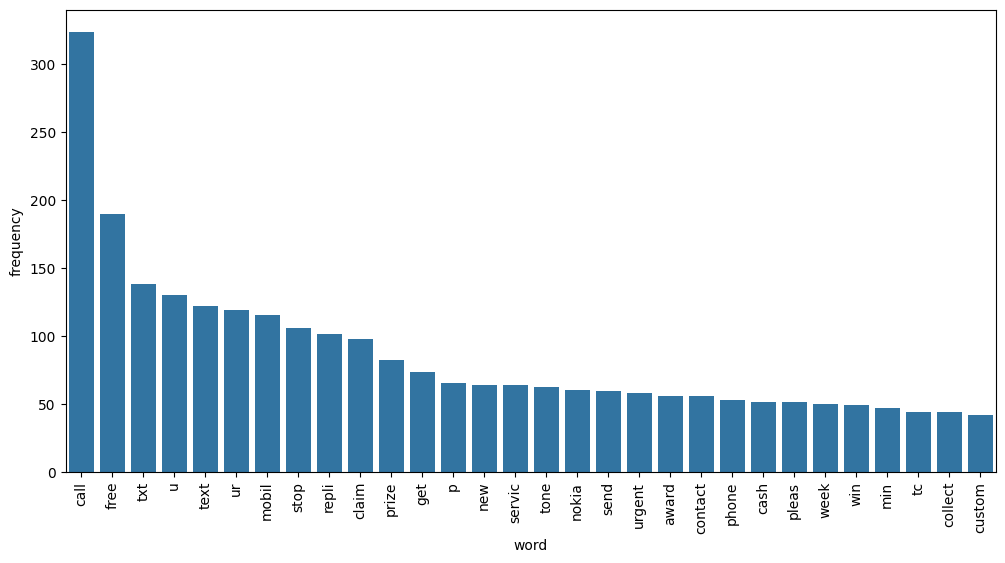

In [41]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_word_freq,x='word',y='frequency')
plt.xticks(rotation=90)
plt.show()


# HAM

In [42]:
ham_corpus=[]
for msg in df[df['Target']==0]['cleaned_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [43]:
ham_word_fre = Counter(ham_corpus).most_common(30)
df_ham_freq = pd.DataFrame(ham_word_fre,columns=['word','frequency'])


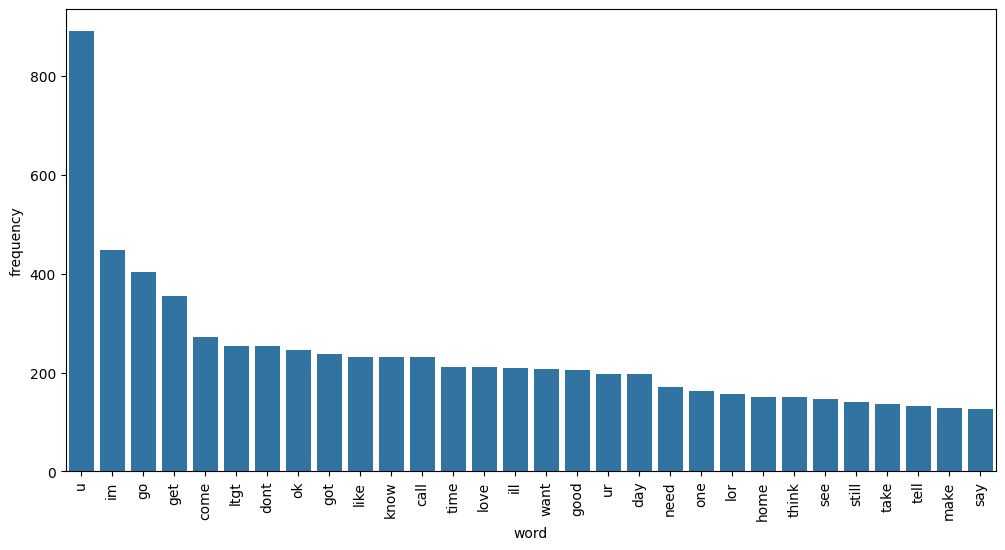

In [44]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_ham_freq,x='word',y='frequency')
plt.xticks(rotation='vertical')
plt.show()

# Model Buildng

In [45]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf =TfidfVectorizer(max_features=3000)

In [46]:
x =tfidf.fit_transform(df['cleaned_text']).toarray()

In [47]:
x.shape

(5169, 3000)

In [48]:
y=df['Target'].values

In [49]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [50]:
from sklearn.model_selection import train_test_split


In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [52]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score

In [53]:
nb =GaussianNB()
mb=MultinomialNB()
ber =BernoulliNB()

In [105]:
nb.fit(x_train, y_train)
mb.fit(x_train, y_train)
ber.fit(x_train, y_train)

# Predictions
y_pred_nb = nb.predict(x_test)
y_pred_mb = mb.predict(x_test)
y_pred_ber = ber.predict(x_test)

# Evaluation
print("GaussianNB Accuracy:", accuracy_score(y_test, y_pred_nb))
print("MultinomialNB Accuracy:", accuracy_score(y_test, y_pred_mb))
print("BernoulliNB Accuracy:", accuracy_score(y_test, y_pred_ber))

GaussianNB Accuracy: 0.8578336557059961
MultinomialNB Accuracy: 0.9738878143133463
BernoulliNB Accuracy: 0.9758220502901354


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [56]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [57]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [58]:
def train_algo(clf,x_train,x_test,y_train,y_test):
    clf.fit(x_train,y_train)
    y_pred =clf.predict(x_test)
    accuracy =accuracy_score(y_test,y_pred)

    return accuracy

In [59]:
accuracies=[]
for i,clf in clfs.items():
    current_accuracy=train_algo(clf,x_train,x_test,y_train,y_test)
    print('for',i)
    print('Accuracy : ',current_accuracy)

    accuracies.append(current_accuracy)

for SVC
Accuracy :  0.9738878143133463
for KN
Accuracy :  0.913926499032882
for NB
Accuracy :  0.9738878143133463
for DT
Accuracy :  0.9361702127659575
for LR
Accuracy :  0.9458413926499033
for RF
Accuracy :  0.9671179883945842
for AdaBoost
Accuracy :  0.913926499032882
for BgC
Accuracy :  0.9622823984526112
for ETC
Accuracy :  0.9729206963249516
for GBDT
Accuracy :  0.9448742746615088
for xgb
Accuracy :  0.9671179883945842


In [60]:
performance_df =pd.DataFrame({'Alogrithm':clfs.keys(),'Accuracy':accuracies})

In [61]:
performance_df

,Alogrithm,Accuracy
0,SVC,0.973888
1,KN,0.913926
2,NB,0.973888
3,DT,0.936170
4,LR,0.945841
5,RF,0.967118
6,AdaBoost,0.913926
7,BgC,0.962282
8,ETC,0.972921
9,GBDT,0.944874


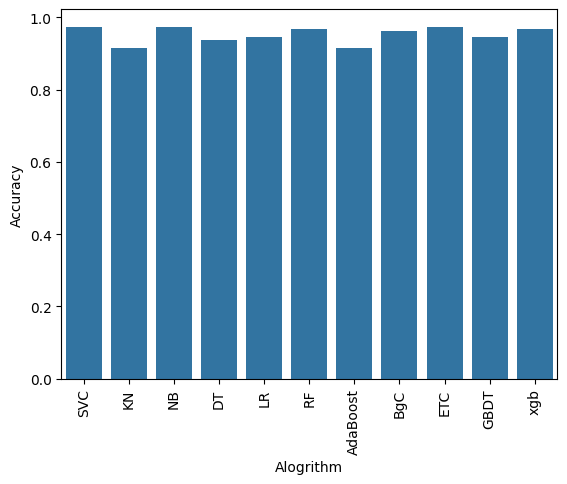

In [70]:
a = sns.barplot(data=performance_df,x='Alogrithm',y='Accuracy')
plt.xticks(rotation='vertical')
plt.show()

In [90]:
# Example new text
new_test_sample_ham = ["Hi I m Sonal Sarode and I am glad to share the program that I ve written with everyone"]
new_test_sample_spam = ["Congratulations! You won a free iPhone. Click here to claim now."]

# Transform using the same tfidf vectorizer
new_test_transformed = tfidf.transform(new_test_sample_ham).toarray()
new_test_transformed_spam = tfidf.transform(new_test_sample_spam).toarray()

# Predict using the trained models
nb_pred_new = nb.predict(new_test_transformed_spam)
mb_pred_new = mb.predict(new_test_transformed_spam)
ber_pred_new = ber.predict(new_test_transformed)

print("GaussianNB Prediction:", nb_pred_new)
print("MultinomialNB Prediction:", mb_pred_new)
print("BernoulliNB Prediction:", ber_pred_new)


GaussianNB Prediction: [1]
MultinomialNB Prediction: [1]
BernoulliNB Prediction: [0]


In [93]:
svc_new =svc.predict(new_test_transformed_spam)

In [95]:
svc_new

array([1])